## Data Acquisition 2
#### Dataset from: Skin Cancer MNIST HAM 10 000 
https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000?resource=download

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
# load dataset
file_path = 'HAM 10000/HAM10000_metadata.csv'
df = pd.read_csv(file_path)

# print data types of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [10]:
# Display first 5 data rows
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Key similarities / differences with ISIC dataset
- both provide age (age_approx), sex and localization (anatom_site_general challenge) of patient
- HAM10000 categorizes the diagnoses into 7 classes, without indication of benign / malignant.
- by comparison HAM10000 has a smaller size

#### Under 'dx', there are 7 classes of skin cancer lesions. They consist of:
- Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
- basal cell carcinoma (bcc)
- benign keratosis-like lesions (bkl)
- dermatofibroma (df)
- melanoma (mel)
- melanocytic nevi (nv)
- vascular lesions (vas)

In [11]:
# Display summary statistics
print(df.describe())

               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [12]:
# Check for missing values
print(df.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [13]:
# Remove rows with missing values
df_cleaned = df.dropna()

In [58]:
unknown_sex_count = (df['sex'] == 'unknown').sum()
print(unknown_sex_count)

# Remove rows with unknown sex?
# df_cleaned = df[df['sex'] != 'unknown']

57


## 1. Univariate Analysis: Visualising distributions of variables

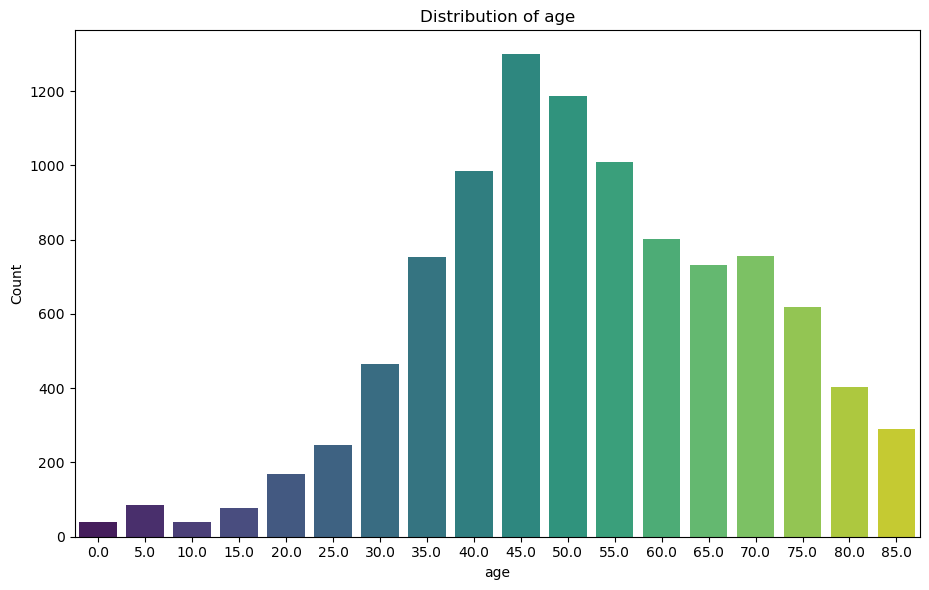

In [15]:
# Countplot for age - Categorical variable
plt.figure(figsize=(18, 6)) 

plt.subplot(1, 2, 1)
sns.countplot(x=df['age'], palette='viridis')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

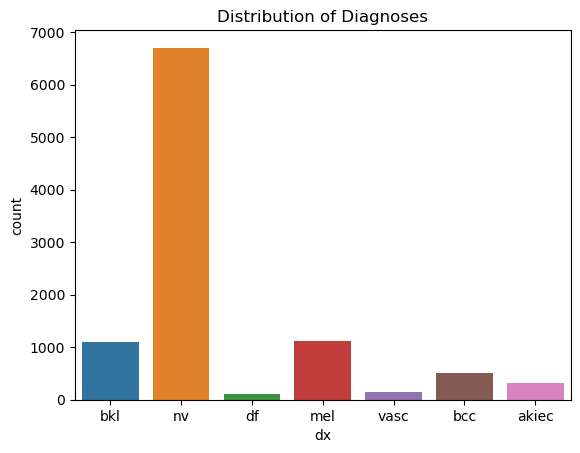

In [18]:
sns.countplot(x='dx', data=df)
plt.title('Distribution of Diagnoses')
plt.show()

A very large majority of the diagnoses are in the nv category (melanocytic nevi).

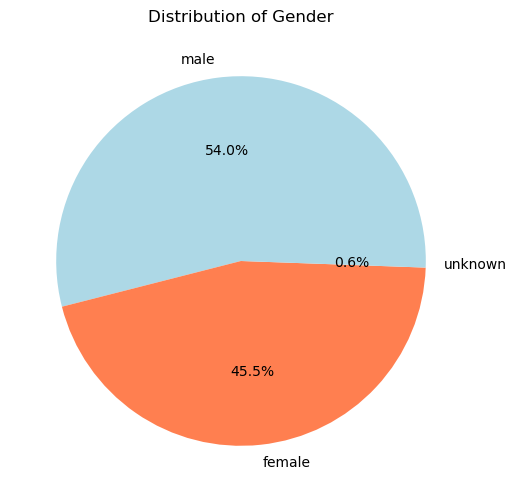

In [31]:
# Display gender distribution in pie chart
plt.figure(figsize=(8, 6))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'coral'])
plt.title('Distribution of Gender')
plt.show()

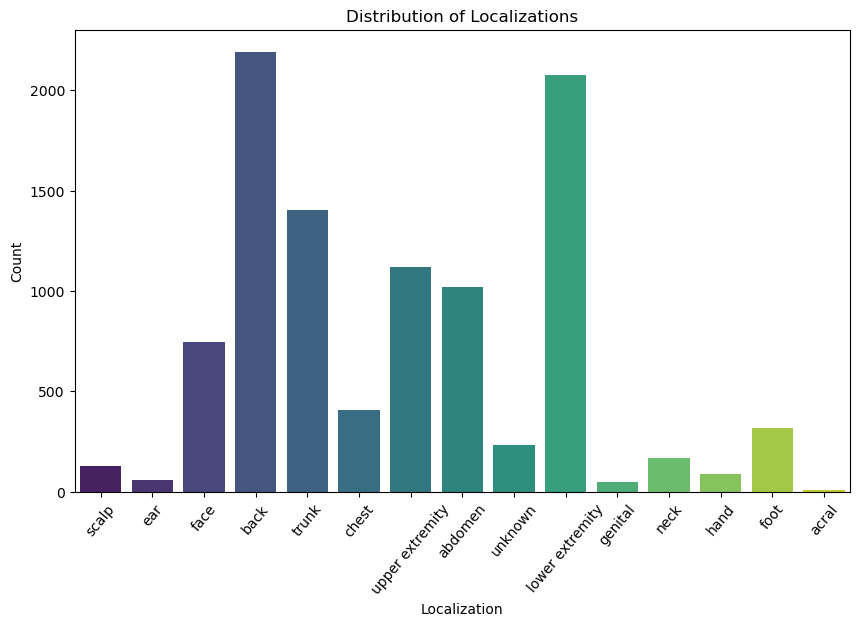

In [37]:
# countplot for localization
plt.figure(figsize=(10, 6))
sns.countplot(x='localization', data=df, palette='viridis')
plt.title('Distribution of Localizations')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

## 2. Multivariate Analysis: Comparing 2 or more variables

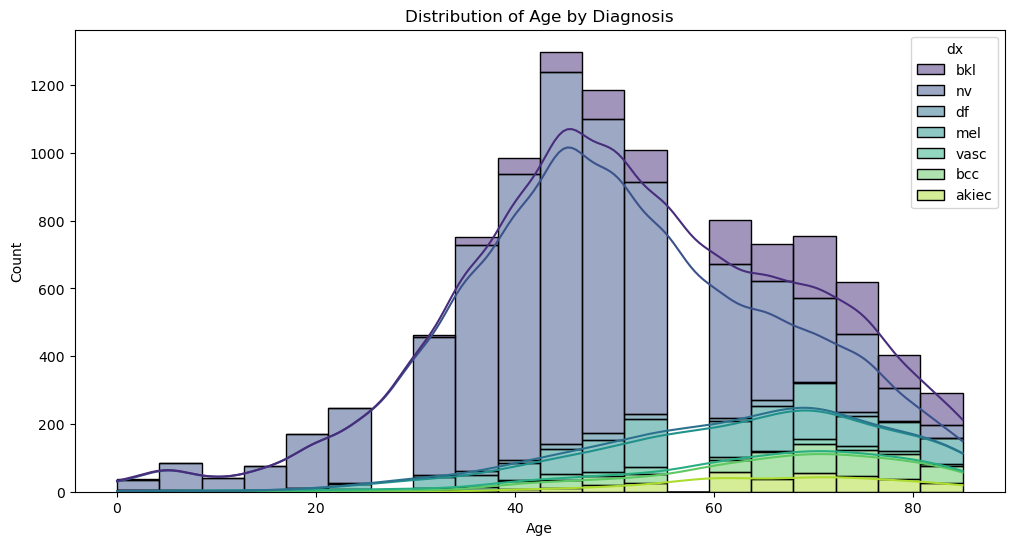

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='dx', multiple='stack', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

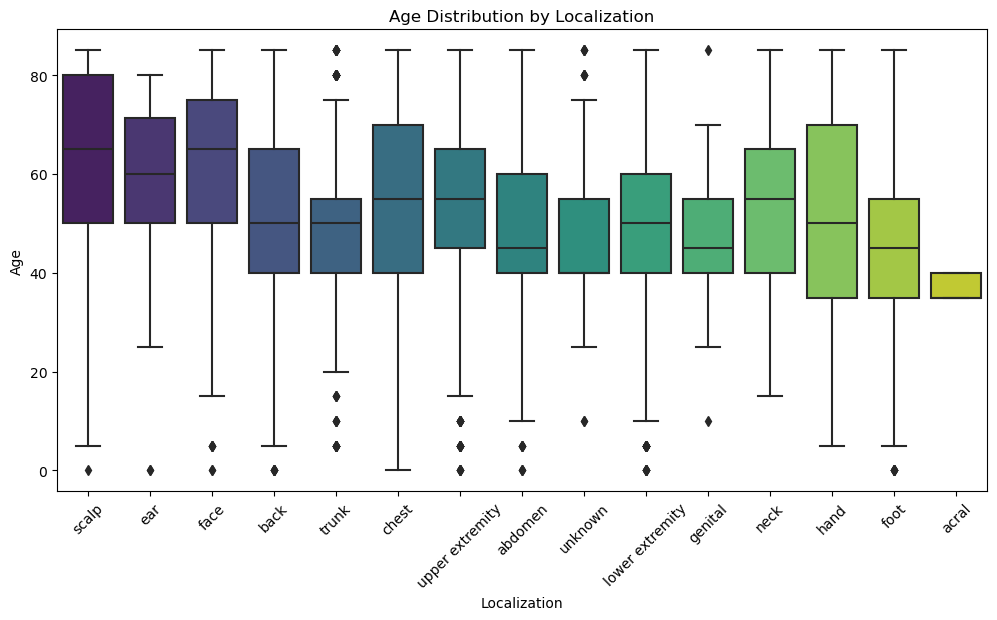

In [52]:
# Box Plot for Age by Localization
plt.figure(figsize=(12, 6))
sns.boxplot(x='localization', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Localization')
plt.xlabel('Localization')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

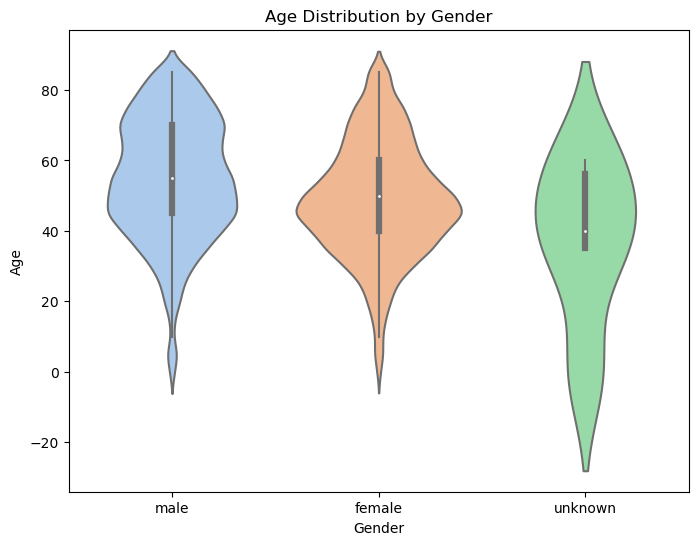

In [51]:
# Violin plot for age distribution by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

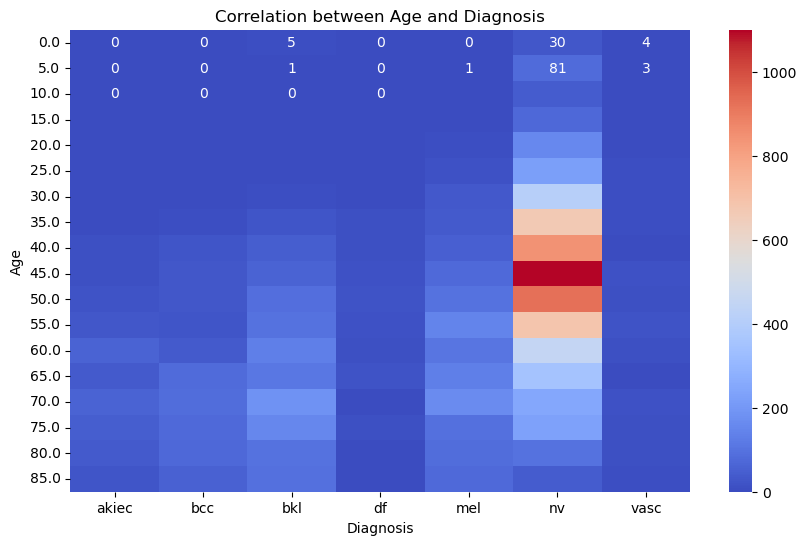

In [60]:
# Heatmap for Correlation between Age and Diagnosis
plt.figure(figsize=(10, 6))
heatmap_data = df.groupby(['age', 'dx']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Correlation between Age and Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

# It is possible that only nv shows a correlation as the other categories have too small of a sample size, therefore this map isn't very useful.